In [1]:
# ---------------------------------------- File 4_merge_SN ---------------------------------------- #
# This is the fourth step of creating the NSMI for the Netherlands. 
# This script will merge file 2_LAC_SN_geo (Statistics Netherlands - geometry & socio-demographic data) and file 3_LAC_SN_dis (Statistics Netherlands - distances) into one file.

# Importing the libraries for this script
import geopandas as gpd
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# ---------------------------------------------- PART 1 ---------------------------------------------- #	
# This first part of the script will locate and merge the two files per year. 

In [3]:
# -------------------------------- Statistics Netherlands General & Distances 2018 --------------------------------
# Load the.gpkg (geopackage) file of file 2 into a GeoDataFrame.
geodataframe_file2_2018 = gpd.read_file("output/2_SN_geo_2018.gpkg")
# print the number of rows in the GeoDataFrame
num_rows2 = len(geodataframe_file2_2018)
print(f"Number of rows: {num_rows2}")

# Load the .csv (excel) file of file 3 into a GeoDataFrame.
dataframe_file3_2018 = pd.read_csv("output/3_SN_dis_2018.csv", encoding='ISO-8859-1', sep=';')
# print the number of rows in the GeoDataFrame
num_rows3 = len(dataframe_file3_2018)
print(f"Number of rows: {num_rows3}")

# Merge the two DataFrames based on the 'neighborhoodcode' column
# Perform an outer merge
merged_geodataframe_2018 = pd.merge(geodataframe_file2_2018, dataframe_file3_2018, on='neighborhoodcode', how='inner', indicator=True)

# Count the number of rows that could not be merged
num_rows_not_merged = len(dataframe_file3_2018) - len(merged_geodataframe_2018)
print(f"Number of rows that could not be merged: {num_rows_not_merged}")

# Show random rows of the datasets to check if the datasets are properly merged.
merged_geodataframe_2018.sample(10)

Number of rows: 11925
Number of rows: 12682
Number of rows that could not be merged: 765


neighborhoodcode                neighborhoodname  \
11497       BU19403401                            Rijs   
11529       BU19420202                  Godelindebuurt   
8040        BU08553707                      Notre Dame   
4763        BU04051103  Venelaankwartier - Buurt 11 03   
6980        BU07370401                          Suwâld   
1279        BU01530803                         Eekmaat   
9995        BU17210102                     Oranjebuurt   
5709        BU05183034          Transvaalkwartier-Zuid   
862         BU01093034                            Gees   
10822       BU18960108     Landelijk gebied Genemuiden   

       populationdensityperkm2  percentage0to15years  percentage15to25years  \
11497                     32.0                  11.0                   14.0   
11529                   9806.0                  19.0                   10.0   
8040                    5477.0                   9.0                   11.0   
4763                    3108.0                  13.0                   12.0   
6980                     184.0                  22.0                   13.0   
1279                    5088.0                  19.0                   11.0   
9995                    3470.0                  13.0                   11.0   
5709                   20045.0                  21.0                   16.0   
862                      587.0                   9.0                   10.0   
10822                      9.0                  25.0                   26.0   

       percentage25to45years  percentage45to65years  percentage65yearsorolder  \
11497                   16.0                   39.0                      20.0   
11529                   22.0                   32.0                      17.0   
8040                    27.0                   17.0                      36.0   
4763                    12.0                   31.0                      33.0   
6980                    19.0                   32.0                      14.0   
1279                    31.0                   23.0                      17.0   
9995                    19.0                   31.0                      26.0   
5709                    31.0                   25.0                       7.0   
862                     12.0                   37.0                      32.0   
10822                   13.0                   24.0                      11.0   

       percentageonepersonhouseholds  percentagehouseholdswithoutchildren  \
11497                           27.0                                 36.0   
11529                           35.0                                 25.0   
8040                            55.0                                 29.0   
4763                            31.0                                 39.0   
6980                            27.0                                 25.0   
1279                            36.0                                 26.0   
9995                            33.0                                 36.0   
5709                            42.0                                 15.0   
862                             22.0                                 49.0   
10822                            8.0                                 17.0   

       percentagehouseholdswithchildren  percentagewesternmigrationbackground  \
11497                              37.0                                   5.0   
11529                              41.0                                  10.0   
8040                               16.0                                  13.0   
4763                               30.0                                   9.0   
6980                               48.0                                   1.0   
1279                               37.0                                  14.0   
9995                               31.0                                   7.0   
5709                               42.0                                  22.0   
862                         

Number of neighborhoods not in merged_geodataframe_2018: 1388


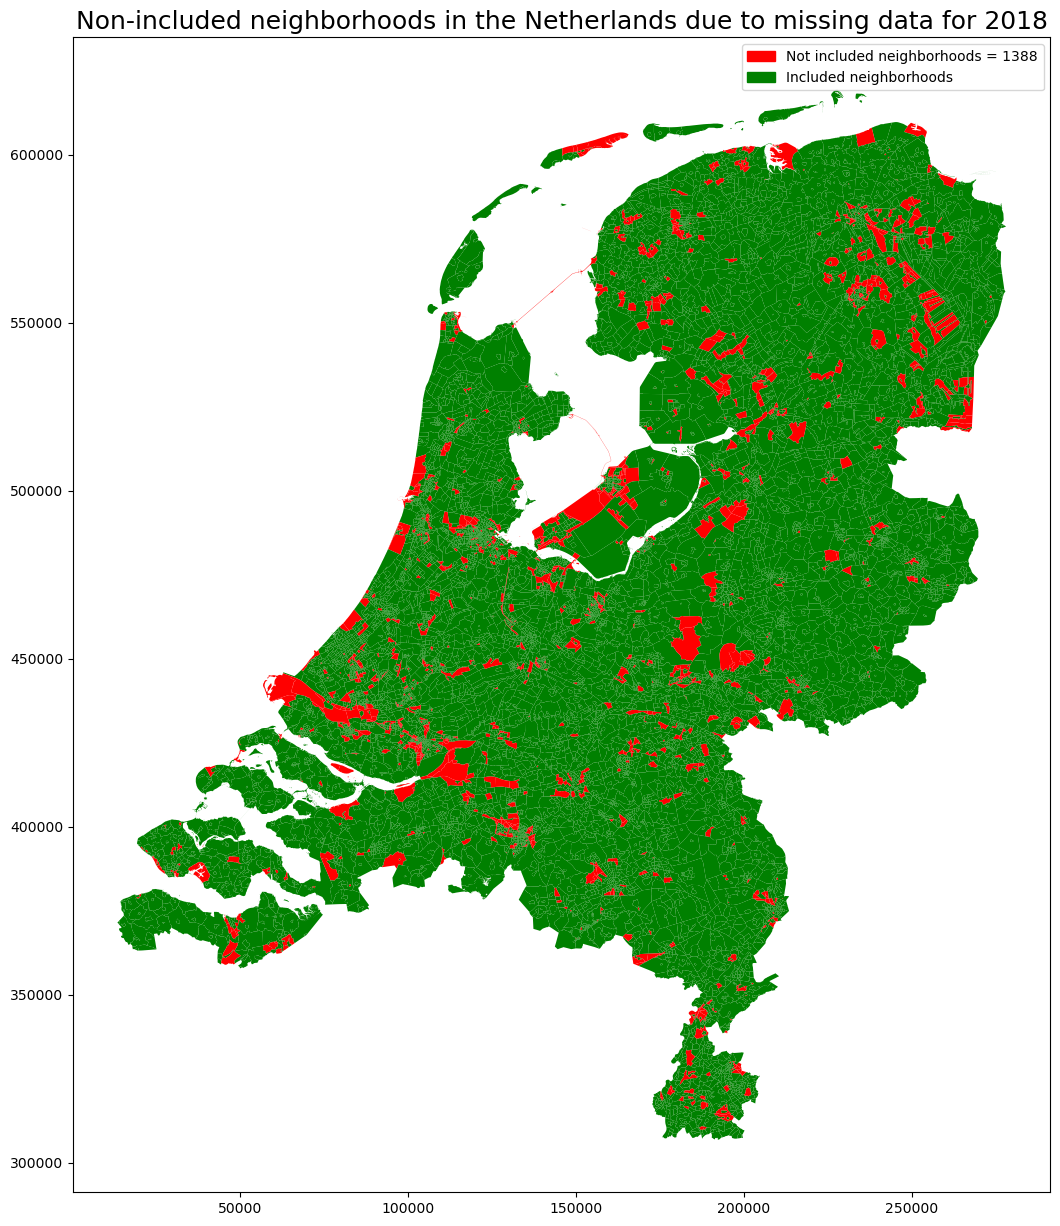

In [6]:
# This piece of code provides insights into the excluded neighborhoods for further data gathering for 2018. 
all_neighborhoods_2018 = gpd.read_file("intermediate/geometry_2018_DS.gpkg")

# Create a boolean mask for neighborhoods in merged_geodataframe_2018
mask = all_neighborhoods_2018['buurtcode'].isin(merged_geodataframe_2018['neighborhoodcode'])

# Count the number of neighborhoods not in merged_geodataframe_2018
num_not_in_merged = (~mask).sum()
print(f"Number of neighborhoods not in merged_geodataframe_2018: {num_not_in_merged}")

# Create a new column 'color' in all_neighborhoods_2018
all_neighborhoods_2018['color'] = 'red'  # default color
all_neighborhoods_2018.loc[mask, 'color'] = 'green'  # color for mutual neighborhoods

# Plot the neighborhoods
fig, ax = plt.subplots(1, 1, figsize=(20, 15))  # make the plot larger
all_neighborhoods_2018.plot(color=all_neighborhoods_2018['color'], ax=ax)  # plot neighborhoods

# Create a custom legend
red_patch = mpatches.Patch(color='red', label=f'Not included neighborhoods = {num_not_in_merged}')
green_patch = mpatches.Patch(color='green', label='Included neighborhoods')
plt.legend(handles=[red_patch, green_patch])

ax.set_title('Non-included neighborhoods in the Netherlands due to missing data for 2018', fontsize=18)  # set the title
plt.show()

In [7]:
# -------------------------------- Statistics Netherlands General & Distances 2019 --------------------------------
# Load the.gpkg (geopackage) file of file 2 into a GeoDataFrame.
geodataframe_file2_2019 = gpd.read_file("output/2_SN_geo_2019.gpkg")
# print the number of rows in the GeoDataFrame
num_rows2 = len(geodataframe_file2_2019)
print(f"Number of rows: {num_rows2}")

# Load the .csv (excel) file of file 3 into a GeoDataFrame.
dataframe_file3_2019 = pd.read_csv("output/3_SN_dis_2019.csv", encoding='ISO-8859-1', sep=';')
# print the number of rows in the GeoDataFrame
num_rows3 = len(dataframe_file3_2019)
print(f"Number of rows: {num_rows3}")

# Merge the two DataFrames based on the 'neighborhoodcode' column
# Perform an outer merge
merged_geodataframe_2019 = pd.merge(geodataframe_file2_2019, dataframe_file3_2019, on='neighborhoodcode', how='inner', indicator=True)

# Count the number of rows that could not be merged
num_rows_not_merged = len(dataframe_file3_2019) - len(merged_geodataframe_2019)
print(f"Number of rows that could not be merged: {num_rows_not_merged}")

# Show random rows of the datasets to check if the datasets are properly merged.
merged_geodataframe_2019.sample(10)

Number of rows: 12169
Number of rows: 12951
Number of rows that could not be merged: 786


neighborhoodcode             neighborhoodname  populationdensityperkm2  \
8880        BU15980802             West en omgeving                   1346.0   
7345        BU07960609            Rosmalense Polder                     13.0   
9875        BU17300000                    Zuidlaren                   1359.0   
6329        BU06320103   Bedrijventerrein Honthorst                   1071.0   
6869        BU07530010                      't Zand                    184.0   
5170        BU04840602                  Lijsterlaan                   9247.0   
10680       BU19002010  Verspreide huizen Easterein                     16.0   
1323        BU01630103                      Den Dam                   1944.0   
3585        BU03610105       Nassaukwartier en Hout                   2619.0   
7115        BU07725410                       Eckart                   6525.0   

       percentage0to15years  percentage15to25years  percentage25to45years  \
8880                   12.0                   15.0                   20.0   
7345                    8.0                   37.0                   10.0   
9875                   15.0                    8.0                   17.0   
6329                    7.0                    8.0                   24.0   
6869                    4.0                   24.0                   38.0   
5170                   11.0                   10.0                   32.0   
10680                  18.0                   14.0                   21.0   
1323                   13.0                    9.0                   22.0   
3585                   18.0                   12.0                   19.0   
7115                   16.0                   12.0                   24.0   

       percentage45to65years  percentage65yearsorolder  \
8880                    32.0                      21.0   
7345                    38.0                       8.0   
9875                    28.0                      33.0   
6329                    29.0                      32.0   
6869                    29.0                       5.0   
5170                    26.0                      22.0   
10680                   34.0                      13.0   
1323                    20.0                      36.0   
3585                    29.0                      23.0   
7115                    24.0                      23.0   

       percentageonepersonhouseholds  percentagehouseholdswithoutchildren  \
8880                            28.0                                 34.0   
7345                            19.0                                 10.0   
9875                            37.0                                 35.0   
6329                            31.0                                 50.0   
6869                            83.0                                  9.0   
5170                            47.0                                 30.0   
10680                            0.0                                 43.0   
1323                            37.0                                 37.0   
3585                            35.0                                 29.0   
7115                            44.0                                 26.0   

       percentagehouseholdswithchildren  percentagewesternmigrationbackground  \
8880                               38.0                                   4.0   
7345                               71.0                                   0.0   
9875                               28.0                                   4.0   
6329                               19.0                                   5.0   
6869                                8.0                                  68.0   
5170                               23.0                                  13.0   
10680                              57.0                                   2.0   
1323                               26.0                                   3.0   
3585                               36.0                      

Number of neighborhoods not in merged_geodataframe_2019: 1429


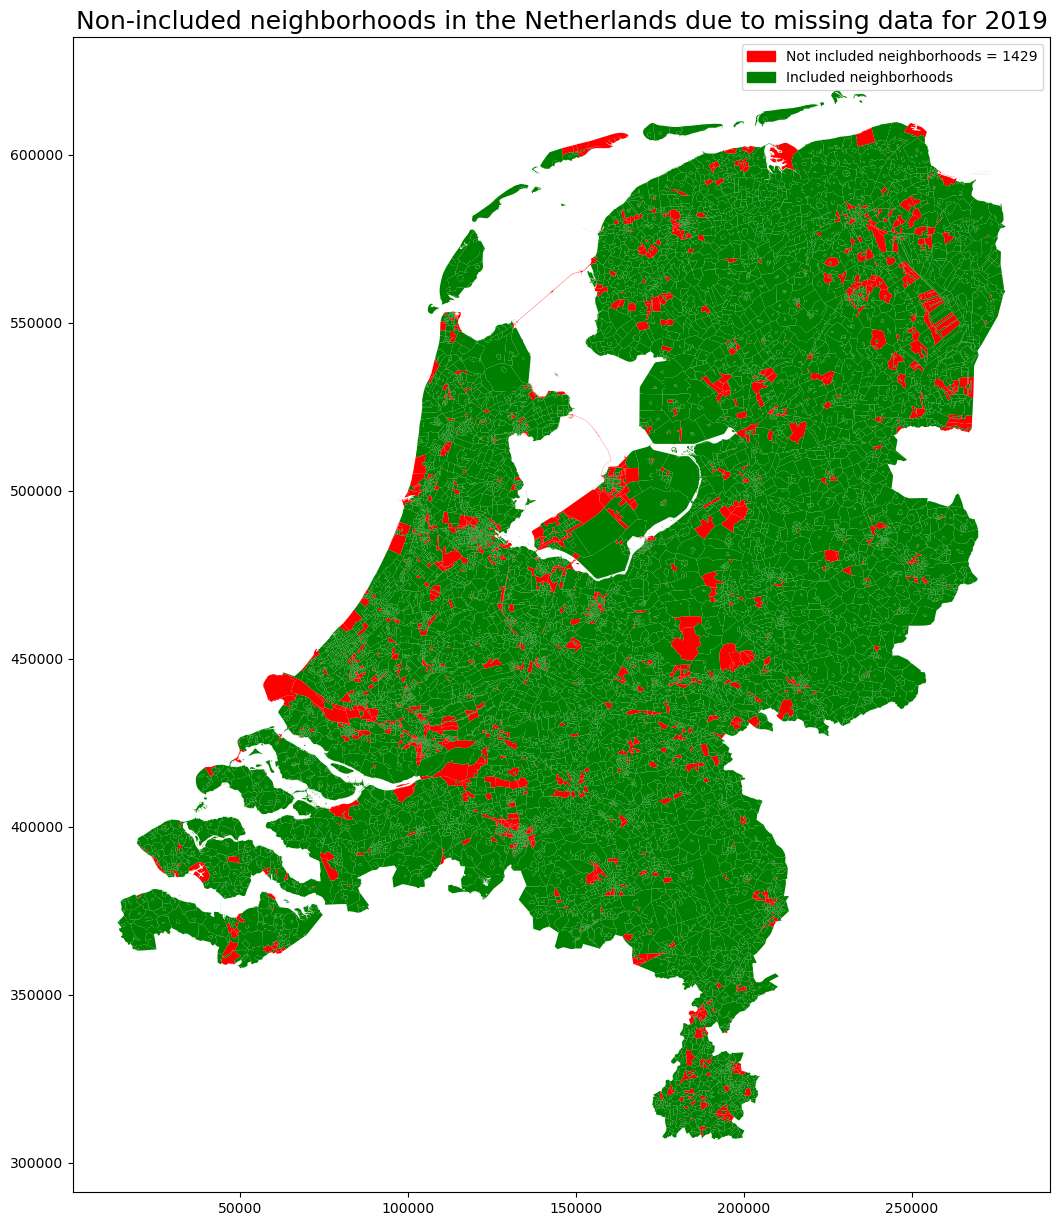

In [8]:
# This piece of code provides insights into the excluded neighborhoods for further data gathering for 2019. 
all_neighborhoods_2019 = gpd.read_file("intermediate/geometry_2019_DS.gpkg")

# Create a boolean mask for neighborhoods in merged_geodataframe_2019
mask = all_neighborhoods_2019['buurtcode'].isin(merged_geodataframe_2019['neighborhoodcode'])

# Count the number of neighborhoods not in merged_geodataframe_2019
num_not_in_merged = (~mask).sum()
print(f"Number of neighborhoods not in merged_geodataframe_2019: {num_not_in_merged}")

# Create a new column 'color' in all_neighborhoods_2019
all_neighborhoods_2019['color'] = 'red'  # default color
all_neighborhoods_2019.loc[mask, 'color'] = 'green'  # color for mutual neighborhoods

# Plot the neighborhoods
fig, ax = plt.subplots(1, 1, figsize=(20, 15))  # make the plot larger
all_neighborhoods_2019.plot(color=all_neighborhoods_2019['color'], ax=ax)  # plot neighborhoods

# Create a custom legend
red_patch = mpatches.Patch(color='red', label=f'Not included neighborhoods = {num_not_in_merged}')
green_patch = mpatches.Patch(color='green', label='Included neighborhoods')
plt.legend(handles=[red_patch, green_patch])

ax.set_title('Non-included neighborhoods in the Netherlands due to missing data for 2019', fontsize=18)  # set the title
plt.show()

In [9]:
# -------------------------------- Statistics Netherlands General & Distances 2020 --------------------------------
# Load the.gpkg (geopackage) file of file 2 into a GeoDataFrame.
geodataframe_file2_2020 = gpd.read_file("output/2_SN_geo_2020.gpkg")
# print the number of rows in the GeoDataFrame
num_rows2 = len(geodataframe_file2_2020)
print(f"Number of rows: {num_rows2}")

# Load the .csv (excel) file of file 3 into a GeoDataFrame.
dataframe_file3_2020 = pd.read_csv("output/3_SN_dis_2020.csv", encoding='ISO-8859-1', sep=';')
# print the number of rows in the GeoDataFrame
num_rows3 = len(dataframe_file3_2020)
print(f"Number of rows: {num_rows3}")

# Merge the two DataFrames based on the 'neighborhoodcode' column
# Perform an outer merge
merged_geodataframe_2020 = pd.merge(geodataframe_file2_2020, dataframe_file3_2020, on='neighborhoodcode', how='inner', indicator=True)

# Count the number of rows that could not be merged
num_rows_not_merged = len(dataframe_file3_2020) - len(merged_geodataframe_2020)
print(f"Number of rows that could not be merged: {num_rows_not_merged}")

# Show random rows of the datasets to check if the datasets are properly merged.
merged_geodataframe_2020.sample(10)

Number of rows: 12349
Number of rows: 13138
Number of rows that could not be merged: 794


neighborhoodcode            neighborhoodname  populationdensityperkm2  \
7342        BU07941501                   Houtsdonk                   1303.0   
3910        BU03635402            Rijnbuurt Midden                   8535.0   
5579        BU05130401                  Zomenbuurt                   6386.0   
7434        BU07961107                De Kruiskamp                   6619.0   
10292       BU17741899  Verspreide huizen Saasveld                     46.0   
4437        BU03940560           Badhoevedorp Oost                   3445.0   
8557        BU09841101                     Centrum                   4523.0   
10541       BU18840203              Woubrugge-West                   7456.0   
8436        BU09710003  Kleine Meers en Veldschuur                    777.0   
1125        BU01500701               Rivierenbuurt                   5137.0   

       percentage0to15years  percentage15to25years  percentage25to45years  \
7342                   11.0                    8.0                   20.0   
3910                   10.0                   11.0                   47.0   
5579                   16.0                   12.0                   19.0   
7434                   17.0                   12.0                   27.0   
10292                  15.0                   14.0                   21.0   
4437                   21.0                   15.0                   19.0   
8557                    5.0                    7.0                   22.0   
10541                  18.0                   12.0                   23.0   
8436                   11.0                   12.0                   21.0   
1125                   19.0                   13.0                   29.0   

       percentage45to65years  percentage65yearsorolder  \
7342                    30.0                      32.0   
3910                    20.0                      13.0   
5579                    26.0                      26.0   
7434                    25.0                      18.0   
10292                   32.0                      18.0   
4437                    33.0                      13.0   
8557                    24.0                      41.0   
10541                   29.0                      18.0   
8436                    37.0                      19.0   
1125                    27.0                      12.0   

       percentageonepersonhouseholds  percentagehouseholdswithoutchildren  \
7342                            46.0                                 31.0   
3910                            54.0                                 30.0   
5579                            28.0                                 36.0   
7434                            38.0                                 27.0   
10292                           23.0                                 32.0   
4437                            22.0                                 26.0   
8557                            58.0                                 31.0   
10541                           27.0                                 31.0   
8436                            20.0                                 41.0   
1125                            31.0                                 26.0   

       percentagehouseholdswithchildren  percentagewesternmigrationbackground  \
7342                               24.0                                  14.0   
3910                               16.0                                  20.0   
5579                               37.0                                   8.0   
7434                               35.0                                  11.0   
10292                              45.0                                   2.0   
4437                               52.0                                  14.0   
8557                               11.0                                  15.0   
10541                              41.0                                   8.0   
8436                               39.0                                 

Number of neighborhoods not in merged_geodataframe_2020: 1464


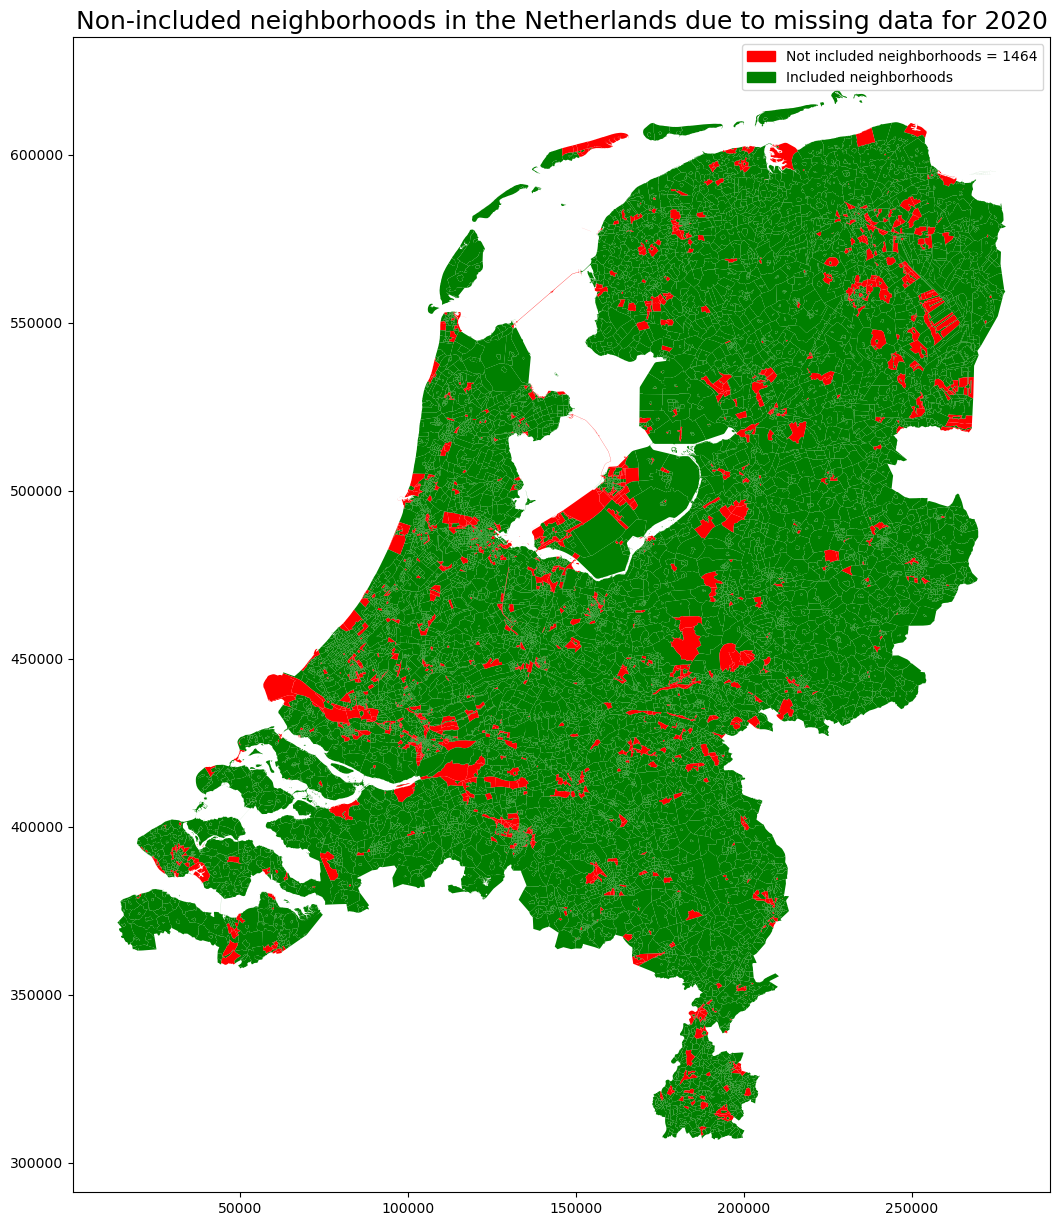

In [10]:
# This piece of code provides insights into the excluded neighborhoods for further data gathering for 2020. 
all_neighborhoods_2020 = gpd.read_file("intermediate/geometry_2020_DS.gpkg")

# Create a boolean mask for neighborhoods in merged_geodataframe_2020
mask = all_neighborhoods_2020['buurtcode'].isin(merged_geodataframe_2020['neighborhoodcode'])

# Count the number of neighborhoods not in merged_geodataframe_2020
num_not_in_merged = (~mask).sum()
print(f"Number of neighborhoods not in merged_geodataframe_2020: {num_not_in_merged}")

# Create a new column 'color' in all_neighborhoods_2020
all_neighborhoods_2020['color'] = 'red'  # default color
all_neighborhoods_2020.loc[mask, 'color'] = 'green'  # color for mutual neighborhoods

# Plot the neighborhoods
fig, ax = plt.subplots(1, 1, figsize=(20, 15))  # make the plot larger
all_neighborhoods_2020.plot(color=all_neighborhoods_2020['color'], ax=ax)  # plot neighborhoods

# Create a custom legend
red_patch = mpatches.Patch(color='red', label=f'Not included neighborhoods = {num_not_in_merged}')
green_patch = mpatches.Patch(color='green', label='Included neighborhoods')
plt.legend(handles=[red_patch, green_patch])

ax.set_title('Non-included neighborhoods in the Netherlands due to missing data for 2020', fontsize=18)  # set the title
plt.show()

In [11]:
# -------------------------------- Statistics Netherlands General & Distances 2021 --------------------------------
# Load the.gpkg (geopackage) file of file 2 into a GeoDataFrame.
geodataframe_file2_2021 = gpd.read_file("output/2_SN_geo_2021.gpkg")
# print the number of rows in the GeoDataFrame
num_rows2 = len(geodataframe_file2_2021)
print(f"Number of rows: {num_rows2}")

# Load the .csv (excel) file of file 3 into a GeoDataFrame.
dataframe_file3_2021 = pd.read_csv("output/3_SN_dis_2021.csv", encoding='ISO-8859-1', sep=';')
# print the number of rows in the GeoDataFrame
num_rows3 = len(dataframe_file3_2021)
print(f"Number of rows: {num_rows3}")

# Merge the two DataFrames based on the 'neighborhoodcode' column
# Perform an outer merge
merged_geodataframe_2021 = pd.merge(geodataframe_file2_2021, dataframe_file3_2021, on='neighborhoodcode', how='inner', indicator=True)

# Count the number of rows that could not be merged
num_rows_not_merged = len(dataframe_file3_2021) - len(merged_geodataframe_2021)
print(f"Number of rows that could not be merged: {num_rows_not_merged}")

# Show random rows of the datasets to check if the datasets are properly merged.
merged_geodataframe_2021.sample(10)

Number of rows: 12575
Number of rows: 13387
Number of rows that could not be merged: 816


neighborhoodcode                 neighborhoodname  \
1395        BU01680409      Verspreide huizen Beuningen   
4574        BU04000604                    Koegras-Noord   
10846       BU19000503          Verspreide huizen IJlst   
10671       BU18920399  Verspreide bebouwing Moordrecht   
5947        BU05690104                     Vrouwenakker   
7822        BU08551103                   Hoogvenne Oost   
2154        BU02260307                            Noord   
10841       BU19000408        Verspreide huizen Hemelum   
2300        BU02430802                       Hanzewaard   
5640        BU05183032          Transvaalkwartier-Noord   

       populationdensityperkm2  percentage0to15years  percentage15to25years  \
1395                      29.0                  15.0                   14.0   
4574                      30.0                   7.0                   23.0   
10846                     23.0                  15.0                   14.0   
10671                     44.0                  13.0                   12.0   
5947                      65.0                  14.0                   13.0   
7822                    7000.0                  12.0                   11.0   
2154                    2509.0                   8.0                   10.0   
10841                     11.0                  16.0                   19.0   
2300                    4492.0                  12.0                   14.0   
5640                   21722.0                  18.0                   14.0   

       percentage25to45years  percentage45to65years  percentage65yearsorolder  \
1395                    17.0                   34.0                      20.0   
4574                    18.0                   34.0                      18.0   
10846                   23.0                   30.0                      18.0   
10671                   15.0                   35.0                      25.0   
5947                    21.0                   29.0                      23.0   
7822                    25.0                   30.0                      22.0   
2154                    13.0                   35.0                      34.0   
10841                   14.0                   35.0                      15.0   
2300                    18.0                   26.0                      30.0   
5640                    31.0                   25.0                      11.0   

       percentageonepersonhouseholds  percentagehouseholdswithoutchildren  \
1395                            24.0                                 33.0   
4574                            21.0                                 33.0   
10846                           36.0                                 30.0   
10671                           24.0                                 41.0   
5947                            19.0                                 34.0   
7822                            46.0                                 34.0   
2154                            26.0                                 49.0   
10841                           26.0                                 24.0   
2300                            41.0                                 28.0   
5640                            49.0                                 16.0   

       percentagehouseholdswithchildren  percentagewesternmigrationbackground  \
1395                               43.0                                   5.0   
4574                               46.0                                   5.0   
10846                              34.0                                   5.0   
10671                              35.0                                   3.0   
5947                               47.0                                   7.0   
7822                               20.0                                   7.0   
2154                               26.0                                  10.0   
10841                              50.0                                   3.0   
2300             

Number of neighborhoods not in merged_geodataframe_2021: 1509


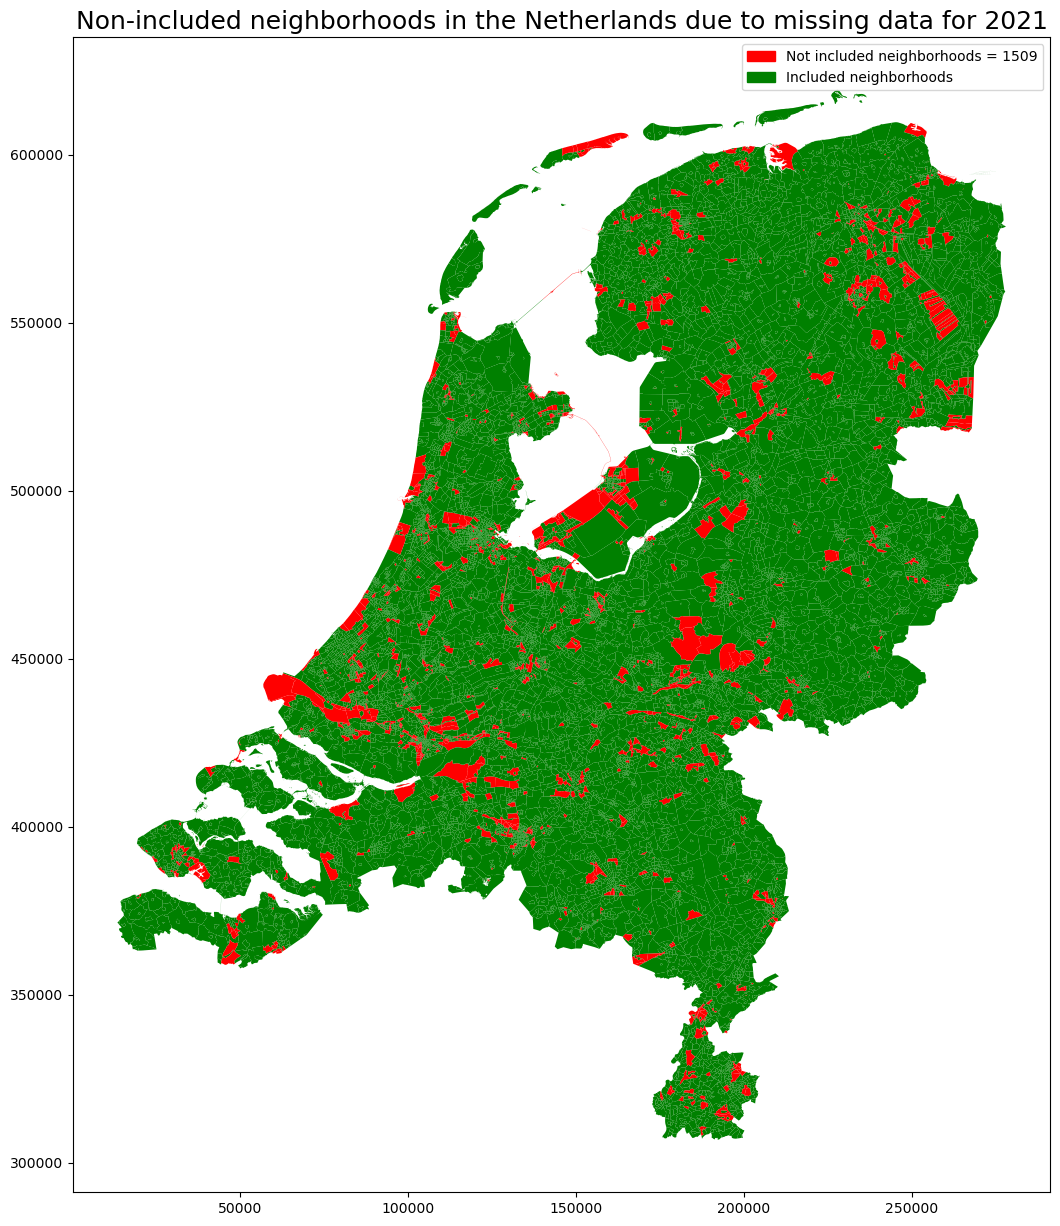

In [12]:
# This piece of code provides insights into the excluded neighborhoods for further data gathering for 2021. 
all_neighborhoods_2021 = gpd.read_file("intermediate/geometry_2021_DS.gpkg")

# Create a boolean mask for neighborhoods in merged_geodataframe_2021
mask = all_neighborhoods_2021['buurtcode'].isin(merged_geodataframe_2021['neighborhoodcode'])

# Count the number of neighborhoods not in merged_geodataframe_2021
num_not_in_merged = (~mask).sum()
print(f"Number of neighborhoods not in merged_geodataframe_2021: {num_not_in_merged}")

# Create a new column 'color' in all_neighborhoods_2021
all_neighborhoods_2021['color'] = 'red'  # default color
all_neighborhoods_2021.loc[mask, 'color'] = 'green'  # color for mutual neighborhoods

# Plot the neighborhoods
fig, ax = plt.subplots(1, 1, figsize=(20, 15))  # make the plot larger
all_neighborhoods_2021.plot(color=all_neighborhoods_2021['color'], ax=ax)  # plot neighborhoods

# Create a custom legend
red_patch = mpatches.Patch(color='red', label=f'Not included neighborhoods = {num_not_in_merged}')
green_patch = mpatches.Patch(color='green', label='Included neighborhoods')
plt.legend(handles=[red_patch, green_patch])

ax.set_title('Non-included neighborhoods in the Netherlands due to missing data for 2021', fontsize=18)  # set the title
plt.show()

In [13]:
# -------------------------------- Statistics Netherlands General & Distances 2022 --------------------------------
# Load the.gpkg (geopackage) file of file 2 into a GeoDataFrame.
geodataframe_file2_2022 = gpd.read_file("output/2_SN_geo_2022.gpkg")
# print the number of rows in the GeoDataFrame
num_rows2 = len(geodataframe_file2_2022)
print(f"Number of rows: {num_rows2}")

# Load the .csv (excel) file of file 3 into a GeoDataFrame.
dataframe_file3_2022 = pd.read_csv("output/3_SN_dis_2022.csv", encoding='ISO-8859-1', sep=';')
# print the number of rows in the GeoDataFrame
num_rows3 = len(dataframe_file3_2022)
print(f"Number of rows: {num_rows3}")

# Merge the two DataFrames based on the 'neighborhoodcode' column
# Perform an outer merge
merged_geodataframe_2022 = pd.merge(geodataframe_file2_2022, dataframe_file3_2022, on='neighborhoodcode', how='inner', indicator=True)

# Count the number of rows that could not be merged
num_rows_not_merged = len(dataframe_file3_2022) - len(merged_geodataframe_2022)
print(f"Number of rows that could not be merged: {num_rows_not_merged}")

# Show random rows of the datasets to check if the datasets are properly merged.
merged_geodataframe_2022.sample(10)

Number of rows: 12753
Number of rows: 13554
Number of rows that could not be merged: 810


neighborhoodcode           neighborhoodname  populationdensityperkm2  \
9347        BU08650008  Vughtse Heide en Lunetten                    495.0   
6418        BU01185900             Stuifzand kern                    908.0   
8268        BU03961002                  De Wadden                   6356.0   
292         BU19310105             Tiendweg Noord                   4559.0   
181         BU08820204                  Lauradorp                   4717.0   
11476       BU00140200                Oranjebuurt                   9810.0   
1268        BU08281900                  Lithoijen                    383.0   
2413        BU06420609     Hilverbeek en omgeving                   5603.0   
11956       BU05750200            Noordwijkerduin                   1024.0   
10565       BU07960609          Rosmalense Polder                     13.0   

       percentage0to15years  percentage15to25years  percentage25to45years  \
9347                   21.0                    7.0                   36.0   
6418                   11.0                   17.0                   19.0   
8268                   21.0                   16.0                   19.0   
292                    15.0                   13.0                   18.0   
181                    12.0                   10.0                   23.0   
11476                   9.0                   23.0                   29.0   
1268                   15.0                   12.0                   18.0   
2413                   17.0                   11.0                   23.0   
11956                   2.0                   15.0                   28.0   
10565                   6.0                   28.0                   22.0   

       percentage45to65years  percentage65yearsorolder  \
9347                    24.0                      12.0   
6418                    33.0                      20.0   
8268                    37.0                       7.0   
292                     36.0                      18.0   
181                     31.0                      24.0   
11476                   22.0                      17.0   
1268                    30.0                      24.0   
2413                    26.0                      22.0   
11956                   25.0                      30.0   
10565                   37.0                       7.0   

       percentageonepersonhouseholds  percentagehouseholdswithoutchildren  \
9347                            33.0                                 22.0   
6418                            21.0                                 46.0   
8268                            14.0                                 23.0   
292                             23.0                                 35.0   
181                             37.0                                 33.0   
11476                           62.0                                 23.0   
1268                            16.0                                 41.0   
2413                            25.0                                 35.0   
11956                           56.0                                 44.0   
10565                           16.0                                 19.0   

       percentagehouseholdswithchildren  percentagewesternmigrationbackground  \
9347                               45.0                                  17.0   
6418                               34.0                                   2.0   
8268                               63.0                                  10.0   
292                                43.0                                   5.0   
181                                30.0                                  19.0   
11476                              15.0                                  14.0   
1268                               43.0                                   4.0   
2413                               40.0                                  10.0   
11956                               0.0                                   7.0   
10

Number of neighborhoods not in merged_geodataframe_2022: 1573


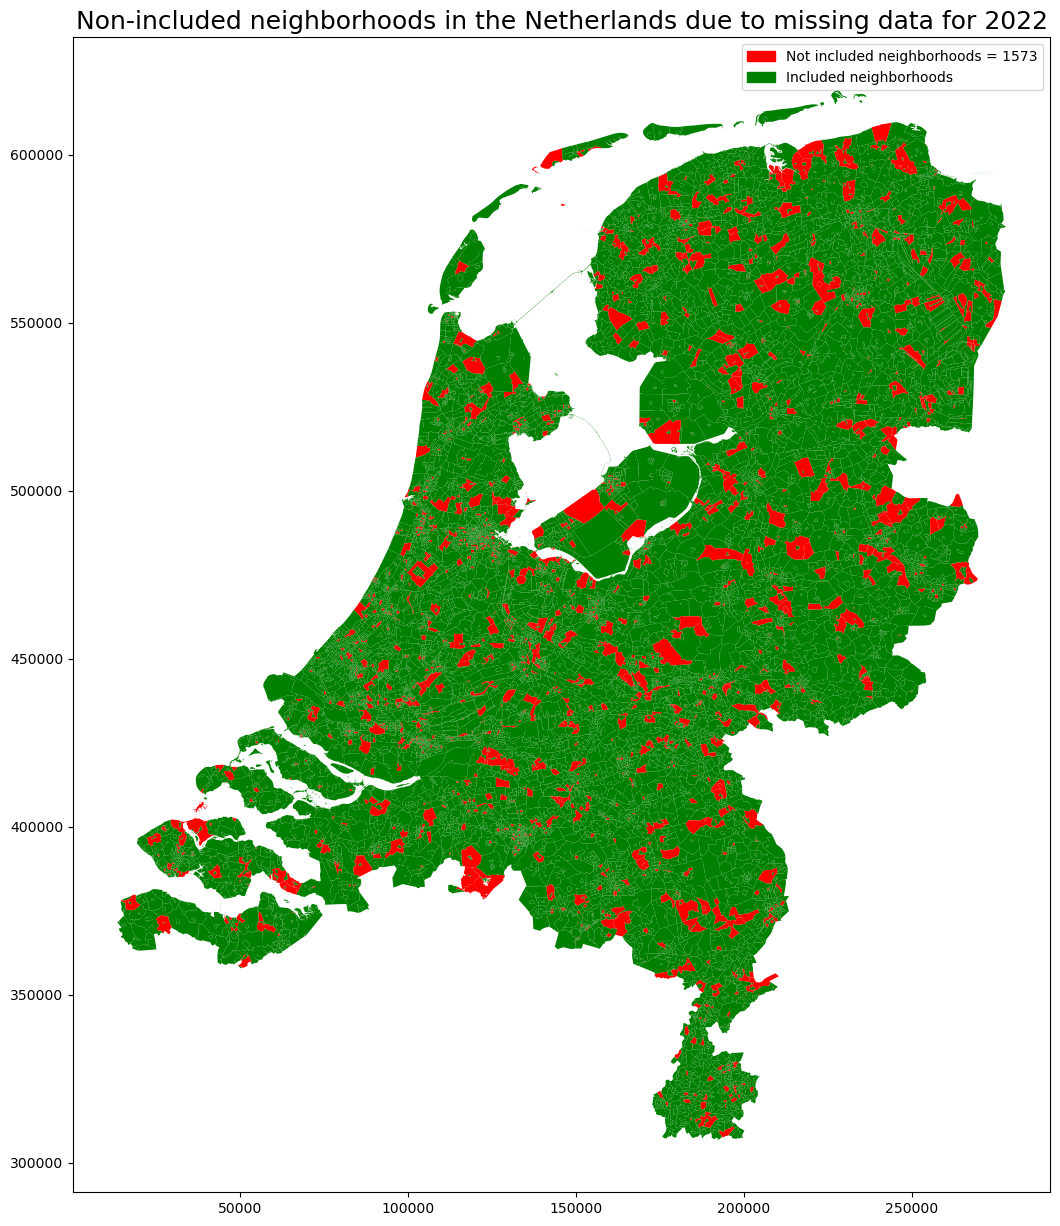

In [14]:
# This piece of code provides insights into the excluded neighborhoods for further data gathering for 2022. 
all_neighborhoods_2022 = gpd.read_file("intermediate/geometry_2022_DS.gpkg")

# Create a boolean mask for neighborhoods in merged_geodataframe_2022
mask = all_neighborhoods_2022['buurtcode'].isin(merged_geodataframe_2022['neighborhoodcode'])

# Count the number of neighborhoods not in merged_geodataframe_2022
num_not_in_merged = (~mask).sum()
print(f"Number of neighborhoods not in merged_geodataframe_2022: {num_not_in_merged}")

# Create a new column 'color' in all_neighborhoods_2022
all_neighborhoods_2022['color'] = 'red'  # default color
all_neighborhoods_2022.loc[mask, 'color'] = 'green'  # color for mutual neighborhoods

# Plot the neighborhoods
fig, ax = plt.subplots(1, 1, figsize=(20, 15))  # make the plot larger
all_neighborhoods_2021.plot(color=all_neighborhoods_2022['color'], ax=ax)  # plot neighborhoods

# Create a custom legend
red_patch = mpatches.Patch(color='red', label=f'Not included neighborhoods = {num_not_in_merged}')
green_patch = mpatches.Patch(color='green', label='Included neighborhoods')
plt.legend(handles=[red_patch, green_patch])

ax.set_title('Non-included neighborhoods in the Netherlands due to missing data for 2022', fontsize=18)  # set the title
plt.show()

In [15]:
# The output of the merging of datasets shows that the Statistics Netherlands General and Distances datasets are properly merged and completely compatible. No rows are lost during the merging process.
# The merged datasets can now be saved as a .gpkg file.

# Drop the '_merge' column since this provides problems if the datasets are saved as geopackage files.
merged_geodataframe_2018 = merged_geodataframe_2018.drop(columns=['_merge'])
merged_geodataframe_2019 = merged_geodataframe_2019.drop(columns=['_merge'])
merged_geodataframe_2020 = merged_geodataframe_2020.drop(columns=['_merge'])
merged_geodataframe_2021 = merged_geodataframe_2021.drop(columns=['_merge'])
merged_geodataframe_2022 = merged_geodataframe_2022.drop(columns=['_merge'])

# Save the GeoDataFrames to .gpkg files
merged_geodataframe_2018.to_file("output/4_merge_SN_2018.gpkg", driver="GPKG")
merged_geodataframe_2019.to_file("output/4_merge_SN_2019.gpkg", driver="GPKG")
merged_geodataframe_2020.to_file("output/4_merge_SN_2020.gpkg", driver="GPKG")
merged_geodataframe_2021.to_file("output/4_merge_SN_2021.gpkg", driver="GPKG")
merged_geodataframe_2022.to_file("output/4_merge_SN_2022.gpkg", driver="GPKG")

In [16]:
# To check if the datasets are saved correctly, show random rows of the datasets.
display(merged_geodataframe_2018.sample(10))
display(merged_geodataframe_2019.sample(10))
display(merged_geodataframe_2020.sample(10))
display(merged_geodataframe_2021.sample(10))
display(merged_geodataframe_2022.sample(10))

neighborhoodcode               neighborhoodname  \
11216       BU19240302           Middelharnis centrum   
7160        BU07580400                       Boeimeer   
10609       BU18760409  Verspreide huizen Hoog-Keppel   
5196        BU04840301                   Steinenbuurt   
828         BU01069911       Verspreide huizen Witten   
8105        BU08555407                 Leeuwerik Zuid   
2972        BU02990300                       Giesbeek   
5030        BU04530203                     Velseroord   
11245       BU19241004    Sommelsdijk vogelbuurt oost   
2250        BU02223104                  Wehl-Zuidoost   

       populationdensityperkm2  percentage0to15years  percentage15to25years  \
11216                   3655.0                  15.0                   11.0   
7160                    4936.0                  17.0                   11.0   
10609                     17.0                  16.0                    2.0   
5196                    5941.0                  15.0                   11.0   
828                        8.0                  17.0                   15.0   
8105                    5601.0                  20.0                   15.0   
2972                    1750.0                  14.0                   12.0   
5030                   10955.0                  17.0                   11.0   
11245                   4743.0                  13.0                    9.0   
2250                      84.0                  19.0                   10.0   

       percentage25to45years  percentage45to65years  percentage65yearsorolder  \
11216                   20.0                   29.0                      25.0   
7160                    24.0                   27.0                      20.0   
10609                   13.0                   37.0                      33.0   
5196                    22.0                   33.0                      19.0   
828                     23.0                   26.0                      18.0   
8105                    24.0                   35.0                       6.0   
2972                    19.0                   33.0                      22.0   
5030                    28.0                   31.0                      14.0   
11245                   15.0                   26.0                      37.0   
2250                    20.0                   26.0                      25.0   

       percentageonepersonhouseholds  percentagehouseholdswithoutchildren  \
11216                           37.0                                 33.0   
7160                            41.0                                 27.0   
10609                           21.0                                 43.0   
5196                            34.0                                 34.0   
828                             49.0                                 24.0   
8105                            17.0                                 27.0   
2972                            28.0                                 36.0   
5030                            37.0                                 26.0   
11245                           39.0                                 32.0   
2250                            27.0                                 35.0   

       percentagehouseholdswithchildren  percentagewesternmigrationbackground  \
11216                              31.0                                   3.0   
7160                               31.0                                  10.0   
10609                              36.0                                  10.0   
5196                               33.0                                  11.0   
828                                27.0                                   3.0   
8105                               56.0                                  12.0   
2972                               36.0                                   8.0   
5030                               37.0                                   9.0   
11245                              29.0

neighborhoodcode                           neighborhoodname  \
9885        BU17300402                Verspreide huizen Westlaren   
2067        BU02140006  Verspreide huizen poldergebied Buurmalsen   
11818       BU19630004                    Oud-Beijerland Zuidwijk   
1847        BU02001403                Agrarisch gebied Beekbergen   
1023        BU01411804                      Schelfhorst-Noordoost   
4458        BU03941295                        Zwaanshoek Omgeving   
4098        BU03639600                           Holendrecht West   
3778        BU03631602             Frederik Hendrikbuurt Zuidwest   
10948       BU19240601                         Oude-Tonge centrum   
7324        BU07960303                               Aawijk-Noord   

       populationdensityperkm2  percentage0to15years  percentage15to25years  \
9885                     418.0                   1.0                    4.0   
2067                      21.0                  22.0                   13.0   
11818                   4241.0                  19.0                   12.0   
1847                     164.0                  11.0                   12.0   
1023                    5052.0                  14.0                   12.0   
4458                      68.0                  15.0                   14.0   
4098                    8322.0                  22.0                   15.0   
3778                   19427.0                   9.0                    8.0   
10948                   4964.0                  14.0                    9.0   
7324                    7380.0                  15.0                   12.0   

       percentage25to45years  percentage45to65years  percentage65yearsorolder  \
9885                    23.0                   39.0                      34.0   
2067                    23.0                   26.0                      16.0   
11818                   20.0                   24.0                      25.0   
1847                    19.0                   36.0                      22.0   
1023                    17.0                   28.0                      29.0   
4458                    18.0                   36.0                      18.0   
4098                    22.0                   24.0                      16.0   
3778                    27.0                   33.0                      22.0   
10948                   21.0                   29.0                      28.0   
7324                    28.0                   27.0                      18.0   

       percentageonepersonhouseholds  percentagehouseholdswithoutchildren  \
9885                            74.0                                 16.0   
2067                            14.0                                 25.0   
11818                           30.0                                 29.0   
1847                            33.0                                 34.0   
1023                            16.0                                 46.0   
4458                            22.0                                 35.0   
4098                            54.0                                 10.0   
3778                            56.0                                 24.0   
10948                           33.0                                 38.0   
7324                            41.0                                 27.0   

       percentagehouseholdswithchildren  percentagewesternmigrationbackground  \
9885                               11.0                                   8.0   
2067                               61.0                                   0.0   
11818                              41.0                                   6.0   
1847                               33.0                                   8.0   
1023                               38.0                                   9.0   
4458                               44.0                                   9.0   
4098                               36.0                              

neighborhoodcode                                   neighborhoodname  \
2021        BU02090491                                    Winssen-Centrum   
4891        BU04410504                                     Debbemeer-Zuid   
4449        BU03940885                                       Weteringbrug   
7594        BU08260607                                  Staatsliedenbuurt   
6738        BU07170800                                         Meliskerke   
4198        BU03770109                                      Overveen-West   
7782        BU08520201  Verspreide huizen Op de Werven ten zuiden van ...   
7874        BU08553303                                    Stappegoor Zuid   
11856       BU19591002                          Bedrijventerrein Rietdijk   
11922       BU19600602                                          Neerijnen   

       populationdensityperkm2  percentage0to15years  percentage15to25years  \
2021                    2301.0                  12.0                   12.0   
4891                    2488.0                  13.0                   12.0   
4449                     150.0                  14.0                   10.0   
7594                    4005.0                  14.0                   10.0   
6738                    4043.0                  26.0                   15.0   
4198                      38.0                  12.0                   16.0   
7782                      94.0                   7.0                   14.0   
7874                    2529.0                  31.0                    3.0   
11856                    101.0                  28.0                   11.0   
11922                    288.0                  10.0                   12.0   

       percentage25to45years  percentage45to65years  percentage65yearsorolder  \
2021                    22.0                   28.0                      26.0   
4891                    19.0                   29.0                      28.0   
4449                    16.0                   35.0                      26.0   
7594                    18.0                   34.0                      24.0   
6738                    21.0                   20.0                      19.0   
4198                     8.0                   33.0                      30.0   
7782                     6.0                   47.0                      27.0   
7874                    50.0                   13.0                       2.0   
11856                   30.0                   18.0                      13.0   
11922                   10.0                   39.0                      29.0   

       percentageonepersonhouseholds  percentagehouseholdswithoutchildren  \
2021                            37.0                                 34.0   
4891                            38.0                                 30.0   
4449                            28.0                                 39.0   
7594                            27.0                                 39.0   
6738                            26.0                                 29.0   
4198                            39.0                                 27.0   
7782                            38.0                                 34.0   
7874                            12.0                                 31.0   
11856                           47.0                                 16.0   
11922                           27.0                                 38.0   

       percentagehouseholdswithchildren  percentagewesternmigrationbackground  \
2021                               29.0                                   6.0   
4891                               32.0                                   5.0   
4449                               34.0                                   7.0   
7594                               34.0                                   9.0   
6738                               45.0                                   3.0   
4198                               34.0                       

neighborhoodcode                    neighborhoodname  \
1772        BU02001202                  Bosgebied Ugchelen   
11228       BU19240303        Middelharnis prinsenkwartier   
10966       BU19010402                          Middelburg   
1029        BU01480306  Verspreide huizen Lemelerveld oost   
76          BU00141206                          Zilvermeer   
6241        BU06130312                Polder Albrandswaard   
5896        BU05470202                              Leyhof   
5955        BU05690300              Ter Aar (buitengebied)   
5288        BU05020334                        Meeuwenbuurt   
8332        BU09174102                    Heerlerbaan-West   

       populationdensityperkm2  percentage0to15years  percentage15to25years  \
1772                       6.0                  11.0                   11.0   
11228                   2882.0                  17.0                   12.0   
10966                    322.0                  11.0                   16.0   
1029                      66.0                  17.0                   16.0   
76                      3717.0                  17.0                   11.0   
6241                     398.0                   5.0                    5.0   
5896                    6240.0                  14.0                   15.0   
5955                     139.0                  23.0                    9.0   
5288                    8092.0                  17.0                   12.0   
8332                    1105.0                  13.0                    8.0   

       percentage25to45years  percentage45to65years  percentage65yearsorolder  \
1772                    23.0                   40.0                      15.0   
11228                   24.0                   30.0                      18.0   
10966                   16.0                   34.0                      23.0   
1029                    15.0                   35.0                      17.0   
76                      16.0                   36.0                      20.0   
6241                    37.0                   39.0                      14.0   
5896                    16.0                   37.0                      18.0   
5955                    29.0                   26.0                      13.0   
5288                    22.0                   27.0                      21.0   
8332                    16.0                   26.0                      37.0   

       percentageonepersonhouseholds  percentagehouseholdswithoutchildren  \
1772                            30.0                                 23.0   
11228                           26.0                                 34.0   
10966                           22.0                                 39.0   
1029                            18.0                                 34.0   
76                              19.0                                 40.0   
6241                            24.0                                 43.0   
5896                            24.0                                 33.0   
5955                            23.0                                 30.0   
5288                            48.0                                 18.0   
8332                            37.0                                 36.0   

       percentagehouseholdswithchildren  percentagewesternmigrationbackground  \
1772                               47.0                                   5.0   
11228                              40.0                                   3.0   
10966                              39.0                                   4.0   
1029                               48.0                                   1.0   
76                                 41.0                                   4.0   
6241                               33.0                                   8.0   
5896                               44.0                                  10.0   
5955                               47.0                          

neighborhoodcode                    neighborhoodname  \
380         BU03550307                         Couwenhoven   
3075        BU02990700                               Aerdt   
503         BU19612302            Vianen buitengebied zuid   
8128        BU03635403                      Rijnbuurt West   
10216       BU03940116            Hoofddorp Floriande West   
1542        BU17280007                  Bladel Veilig Oord   
4528        BU07961301                          Kom Nuland   
5026        BU01144100  Emmen-omgeving Oude Roswinkelerweg   
7788        BU03730113                             Conincx   
2494        BU03636002                  Bloemenbuurt Noord   

       populationdensityperkm2  percentage0to15years  percentage15to25years  \
380                     7124.0                  19.0                   14.0   
3075                      41.0                   8.0                   10.0   
503                       23.0                  13.0                   15.0   
8128                   20961.0                  11.0                    9.0   
10216                   6202.0                  18.0                   16.0   
1542                    1599.0                  14.0                   11.0   
4528                    2043.0                  15.0                   12.0   
5026                    1553.0                  10.0                   10.0   
7788                    6348.0                   9.0                    9.0   
2494                    6993.0                  16.0                    7.0   

       percentage25to45years  percentage45to65years  percentage65yearsorolder  \
380                     21.0                   25.0                      21.0   
3075                    20.0                   33.0                      29.0   
503                     19.0                   38.0                      15.0   
8128                    30.0                   29.0                      22.0   
10216                   22.0                   35.0                      10.0   
1542                    13.0                   31.0                      31.0   
4528                    22.0                   29.0                      22.0   
5026                    17.0                   27.0                      36.0   
7788                    15.0                   37.0                      30.0   
2494                    31.0                   28.0                      18.0   

       percentageonepersonhouseholds  percentagehouseholdswithoutchildren  \
380                             30.0                                 28.0   
3075                            13.0                                 48.0   
503                             24.0                                 28.0   
8128                            66.0                                 15.0   
10216                           24.0                                 23.0   
1542                            19.0                                 45.0   
4528                            27.0                                 35.0   
5026                            42.0                                 32.0   
7788                            49.0                                 29.0   
2494                            45.0                                 23.0   

       percentagehouseholdswithchildren  percentagewesternmigrationbackground  \
380                                42.0                                  10.0   
3075                               39.0                                  12.0   
503                                48.0                                   8.0   
8128                               19.0                                  16.0   
10216                              53.0                                  11.0   
1542                               36.0                                   9.0   
4528                               38.0                                   4.0   
5026                               26.0                          